<a href="https://colab.research.google.com/github/iratuh/DMBI_UI_24/blob/main/CaseStudy2_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama Anggota Kelompok:
- Adiza Noor Daradjatun (2206025943)
- Aghna Syahputra Santoso(2206051481)
- Hutari Andini (2206820680)
- M. Omar Luthy (2206829452)

# Case Study 2 Data Mining
Akan dilakukan *market basket analysis* dengan menggunakan k-means clustering pada data "Mall Customer Segmentation".

Import package yang dibutuhkan:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [ ]:
from google.colab import files
files = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


Read data sebagai dataframe:

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## ANALISA DESKRIPTIF

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

Data memiliki 5 kolom, yaitu identitas pelanggan ('CustomerID'), jenis kelamin ('Gender'), usia ('Age'), penghasilan tahunan ('Annual Income (k$)'), dan skor pengeluaran ('Spending Score (1-100)'). Terdapat 200 entri dan tidak ada entri null.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Dilakukan analisis deskriptif pada kolom int64. Rata-rata pelanggan berumur 38.85 tahun dengan penghasilan tahunan sejumlah $60,000 dan skor pengeluaran sebesar 50.2.

## EDA

In [ ]:
plt.style.use('fivethirtyeight')

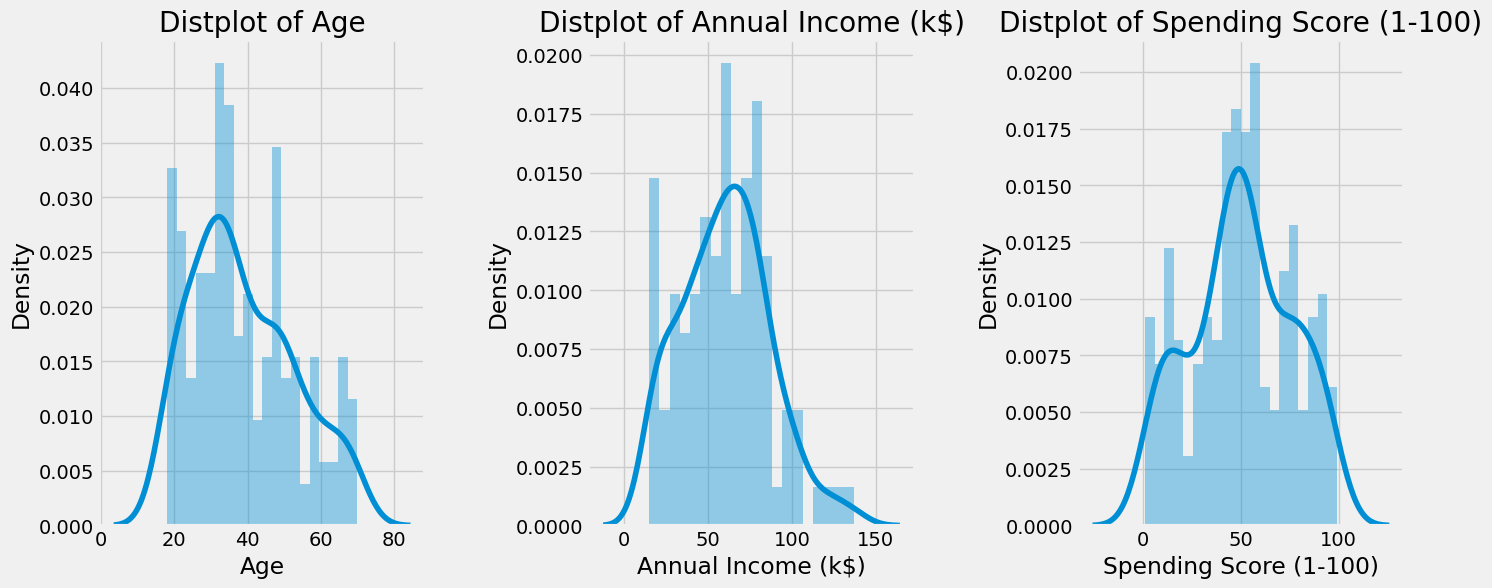

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Ketiga *density plot* dari kolom usia ('Age'), penghasilan tahunan ('Annual Income (k$)'), dan skor pengeluaran ('Spending Score (1-100)') menunjukkan data yang menyerupai *bell curve* dari distribusi normal.

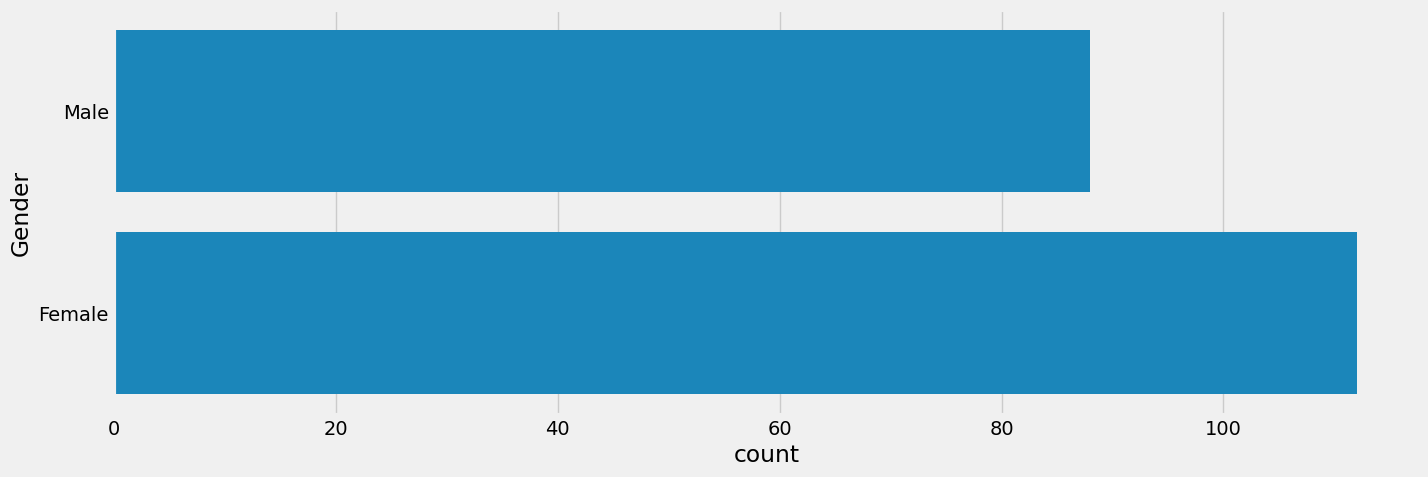

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Bar chart menunjukkan bahwa terdapat lebih banyak pelanggan perempuan daripada laki-laki.

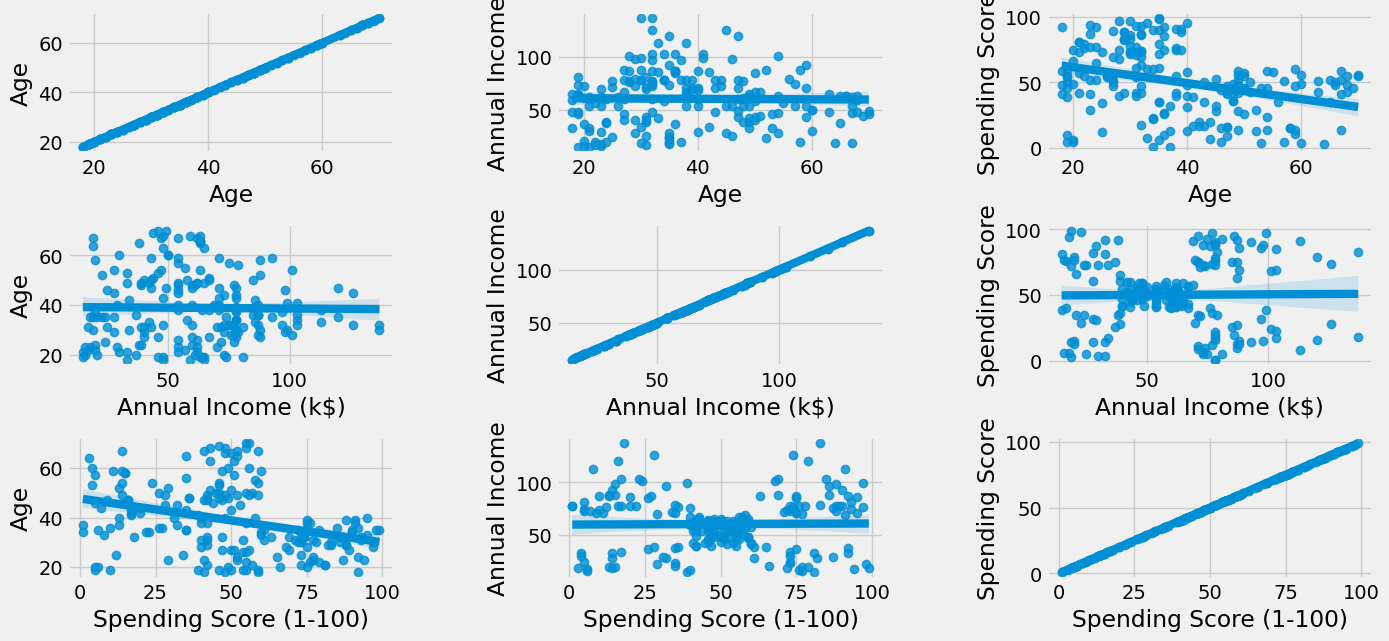

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Scatter plot menunjukkan bahwa usia ('Age') dan skor pengeluaran ('Spending Score (1-100)') memiliki korelasi negatif lemah. Sedangkan variabel-variabel lain tidak menampilkan korelasi.

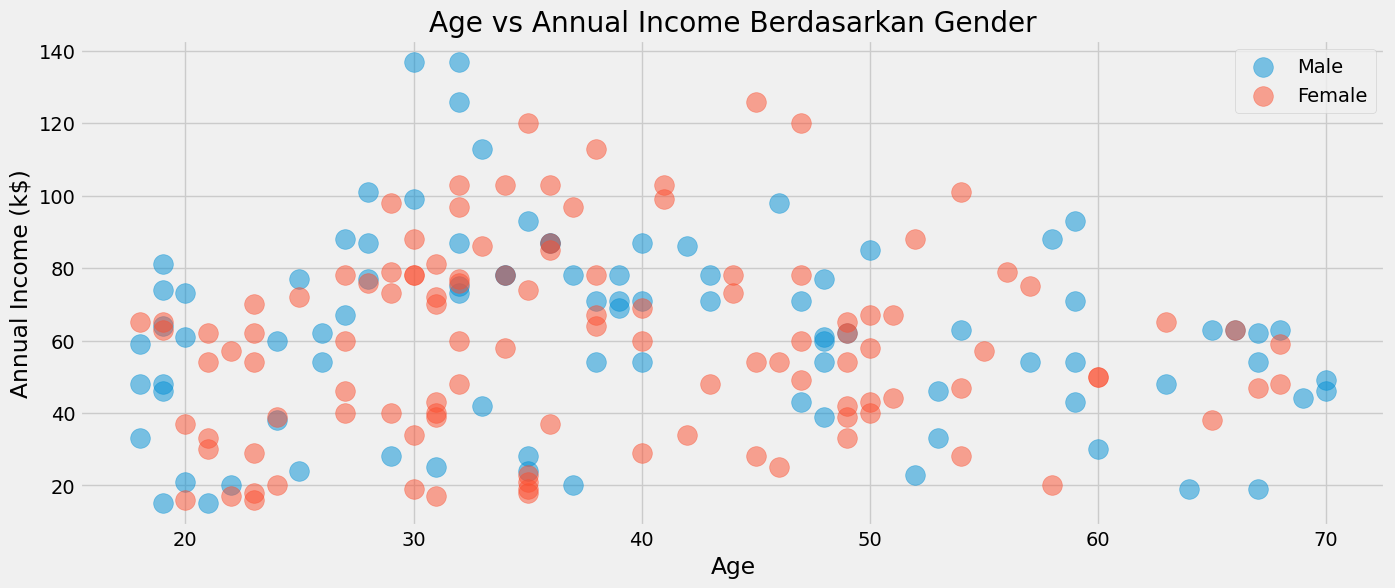

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income Berdasarkan Gender')
plt.legend()
plt.show()

Jika scatter plot usia ('Age') vs. penghasilan tahunan ('Annual Income (k$)') dipisahkan berdasarkan jenis kelamin ('Gender'), tidak ada pola jelas yang terlihat.

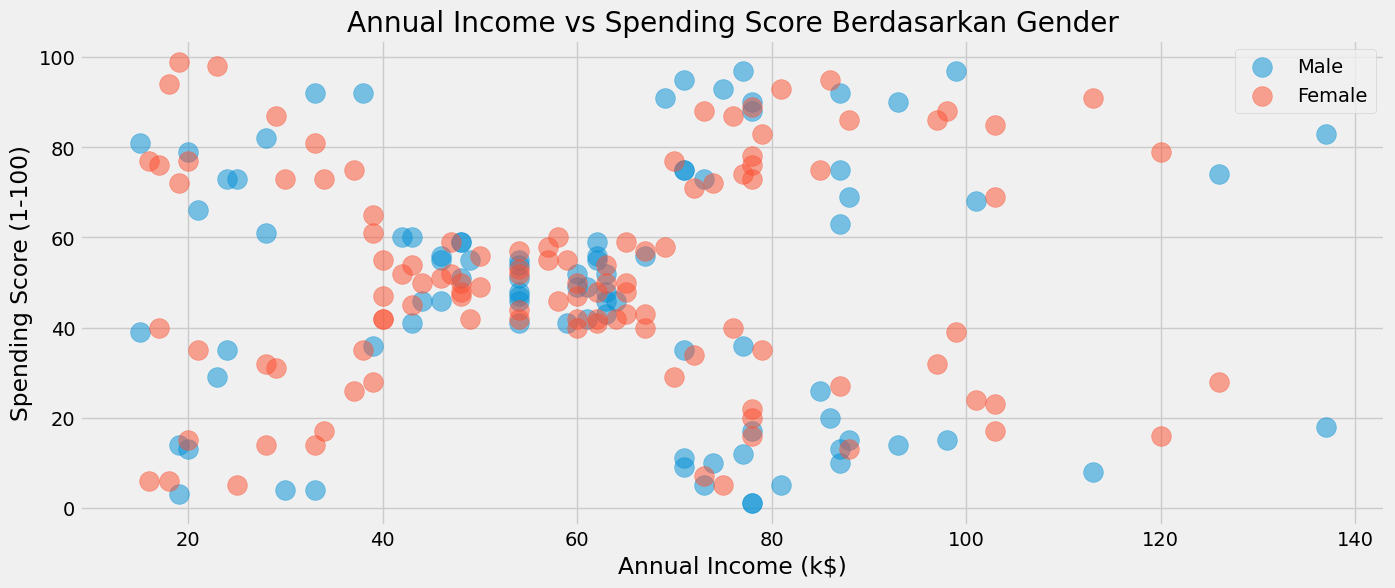

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score Berdasarkan Gender')
plt.legend()
plt.show()

Jika scatter plot skor pengeluaran ('Spending Score (1-100)') vs. penghasilan tahunan ('Annual Income (k$)') dipisahkan berdasarkan jenis kelamin ('Gender'), terlihat bahwa data membuat klaster di skor pengeluaran 40-60 dan penghasilan tahunan $40,000-$60,000.

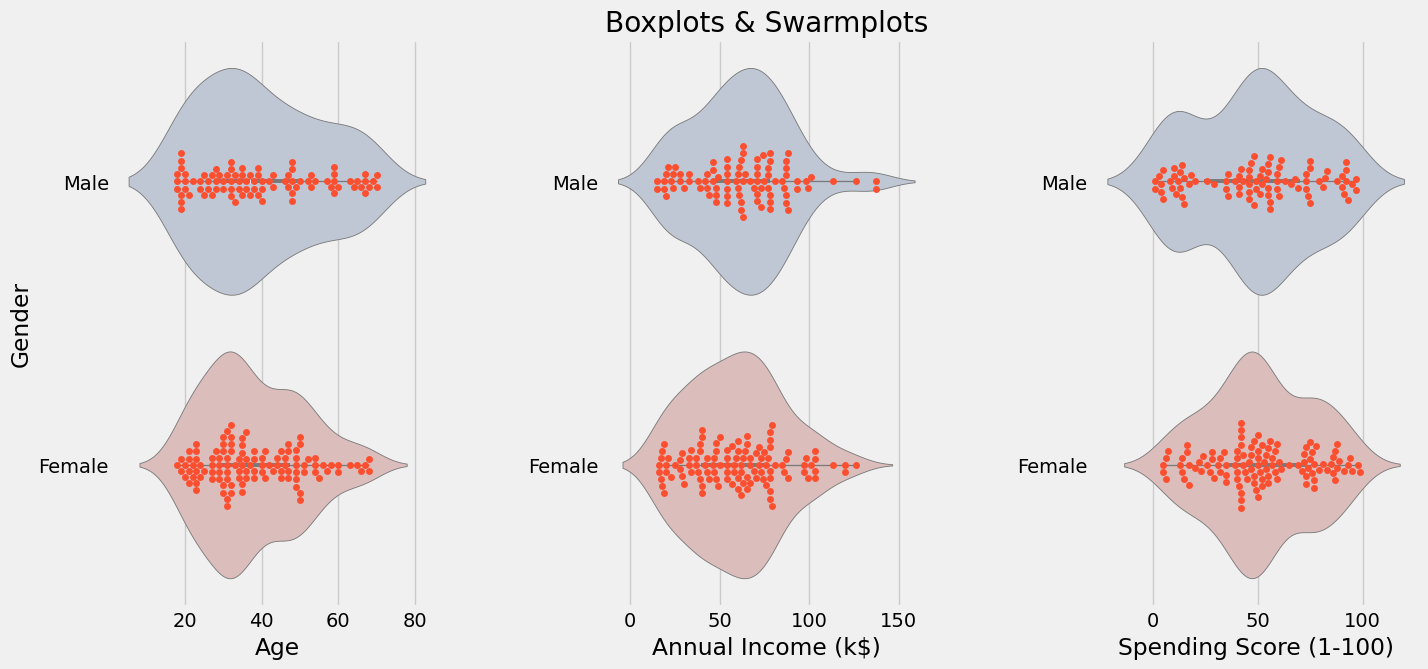

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

Boxplot dari skor pengeluaran ('Spending Score (1-100)') dipisah berdasarkan gender menunjukkan bahwa lebih banyak pelanggan perempuan yang memiliki skor pengeluaran lebih tinggi daripada pelanggan laki-laki.

## K-MEANS CLUSTERING

1. Age and Spending Score Segmentation

Akan dilihat jumlah kluster yang optimal untuk dataset berdasarkan "Age" dan "Spending Score (1-100)". Dengan menghitung inertia untuk setiap percobaan pengelompokan,  maka dapat dilihat elbow point dimana membantu mengidentifikasi jumlah kluster yang ideal.

In [ ]:
# Age and spending Score
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    km1 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    km.fit(X1)
    inertia.append(km.inertia_)

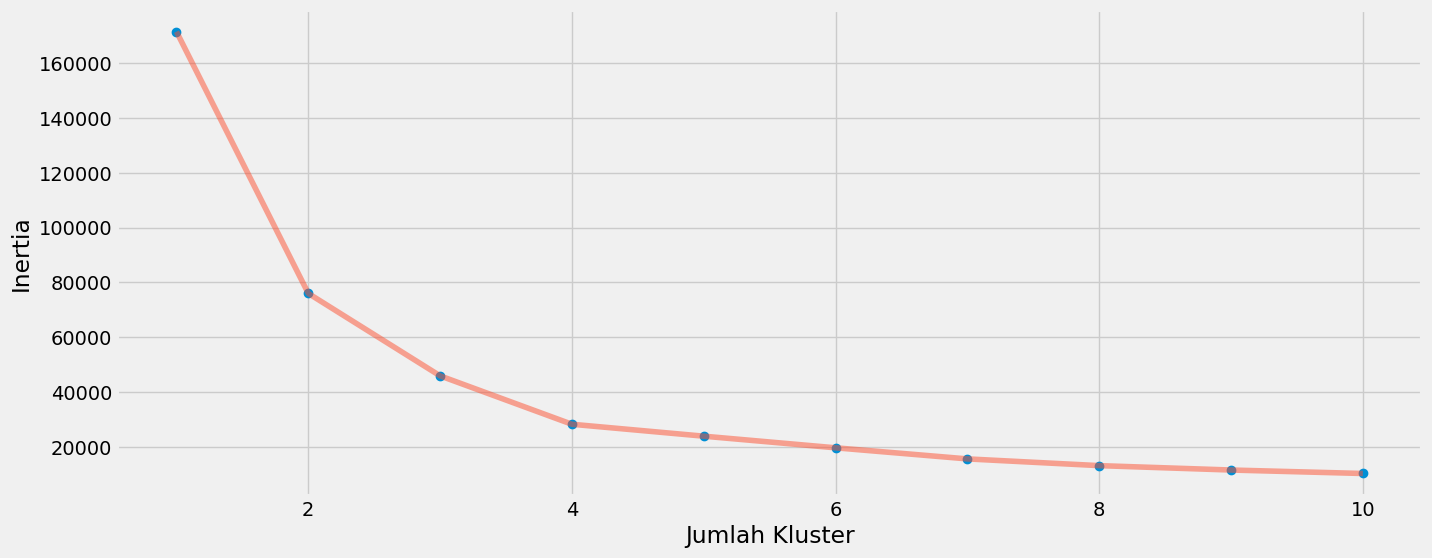

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Jumlah Kluster') , plt.ylabel('Inertia')
plt.show()

Maka, berdasarkan hasil plot elbow point terlihat pada titik 4 sehingga jumlah kluster yang optimal adalah 4.

Selanjutnya, akan dilakukan metode kmeans+++ dengan varian Elkan untuk menentukan 4 kluster tersebut.

In [ ]:
km = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
km.fit(X1)
labels1 = km.labels_
centroids1 = km.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

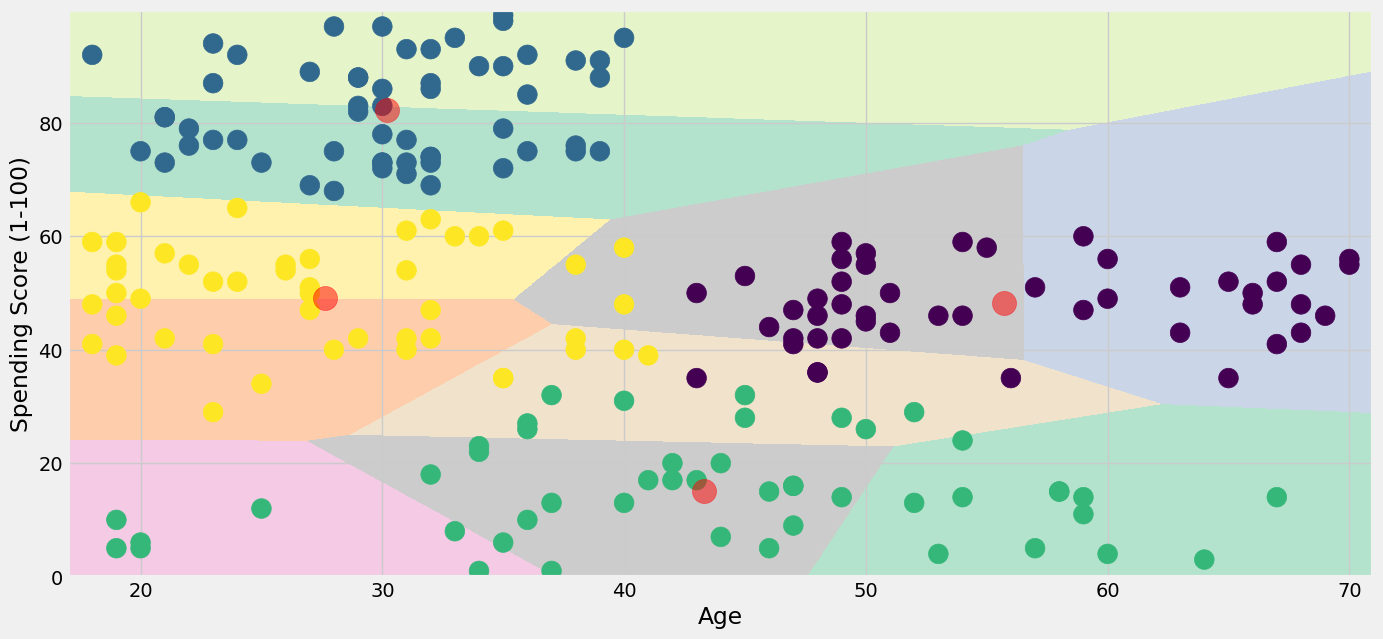

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Maka, hasil clustering mendapatkan kesimpulan berikut:
1. Hijau: Masyarakat dengan pengeluaran kecil (Umur 20 - 70, Spending Score 0 -30)
2. Kuning: Masyarakat Muda dengan pengeluaran moderat (Umur 20 - 40, Spending Score 30 - 65)
3. Hitam: Masyarakat Tua dengan pengeluaran moderat (Umur 40 - 70, Spending Score 30 - 60)
4. Biru: Masyarakat Muda dengan pengeluaran tinggi (Umur 20 - 40, Spending Score 70 - 100)

2. Annual Income and Spending Score Segmentation

Akan dilihat jumlah kluster yang optimal untuk dataset berdasarkan "Annual Income (k$)" dan "Spending Score (1-100)". Dengan menghitung inertia untuk setiap percobaan pengelompokan,  maka dapat dilihat elbow point dimana membantu mengidentifikasi jumlah kluster yang ideal.

In [ ]:
# Annual Income and spending Score
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    km2 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    km2.fit(X2)
    inertia.append(km2.inertia_)

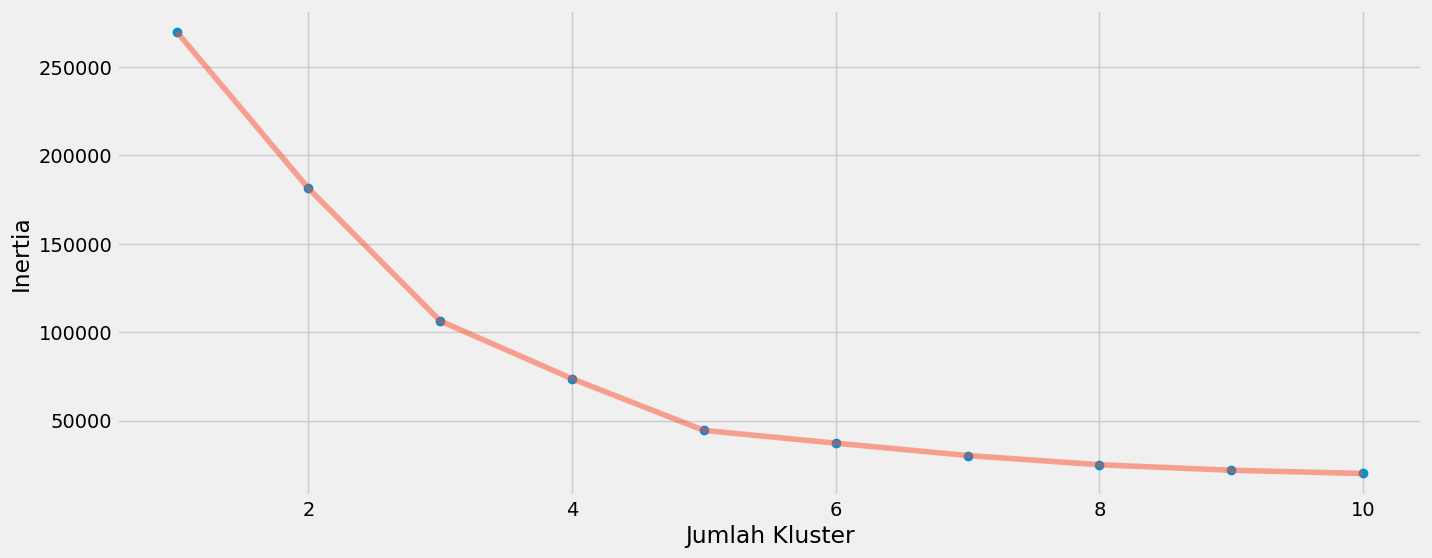

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Jumlah Kluster') , plt.ylabel('Inertia')
plt.show()

Maka, berdasarkan hasil plot elbow point terlihat pada titik 5 sehingga jumlah kluster yang optimal adalah 5.

Selanjutnya, akan dilakukan metode kmeans+++ dengan varian Elkan untuk menentukan 5 kluster tersebut.

In [ ]:
km2 = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
km2.fit(X2)
labels2 = km2.labels_
centroids2 = km2.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = km2.predict(np.c_[xx.ravel(), yy.ravel()])

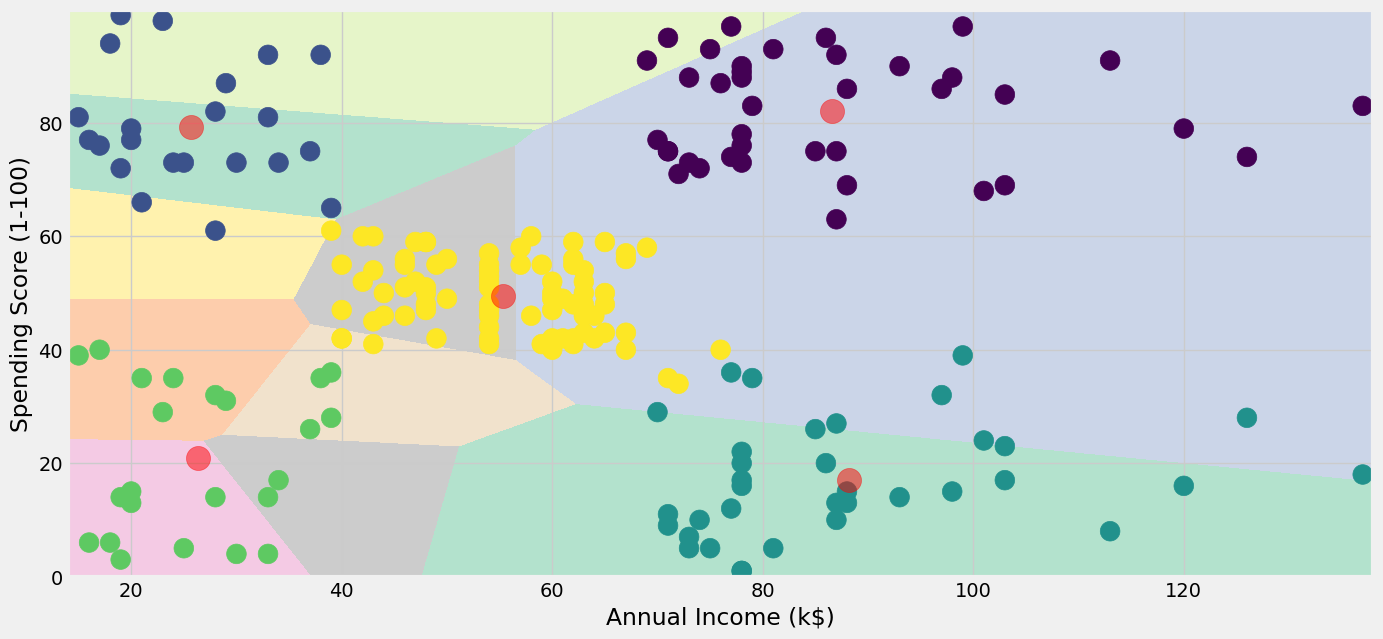

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Maka, hasil clustering mendapatkan kesimpulan berikut:
1. Hijau: Masyarakat Gaji UMR dengan pengeluaran kecil (Annual Income 0 - 40, Spending Score 0 -40)
2. Biru Muda: Masyarakat Gaji Tinggi dengan pengeluaran kecil (Annual Income 70 - 140, Spending Score 0 - 40)
3. Kuning: Masyarakat Gaji Menengah dengan pengeluaran moderat (Annual Income 40 - 70, Spending Score 40 - 60)
4. Biru Tua: Masyarakat Gaji UMR dengan pengeluaran tinggi (Annual Income 0 - 40, Spending Score 60 - 100)
5. Hitam: Masyarakat Gaji Tinggi dengan pengeluaran tinggi (Annual Income 70 - 140, Spending Score 60 - 100)

Hal yang perlu dilihat bahwa pada cluster kuning terdapat beberapa data bergabung dengan cluster biru muda.

## 3. Age, Annual Income, and Spending Score Segmentation

Akan dilakukan pengklusteran antara umur, pendapatan tahunan, dan juga skor pengeluaran yang dilakukan oleh customer. Disini kita akan menentukan jumlah kluster terlebih dahulu dengan menggunakan inertia.

In [ ]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    km3 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    km3.fit(X3)
    inertia.append(km3.inertia_)

Akan dilihat jumlah cluster yang sesuai dengan memperhatikan elbow point dari graph inertia yang telah didapat.

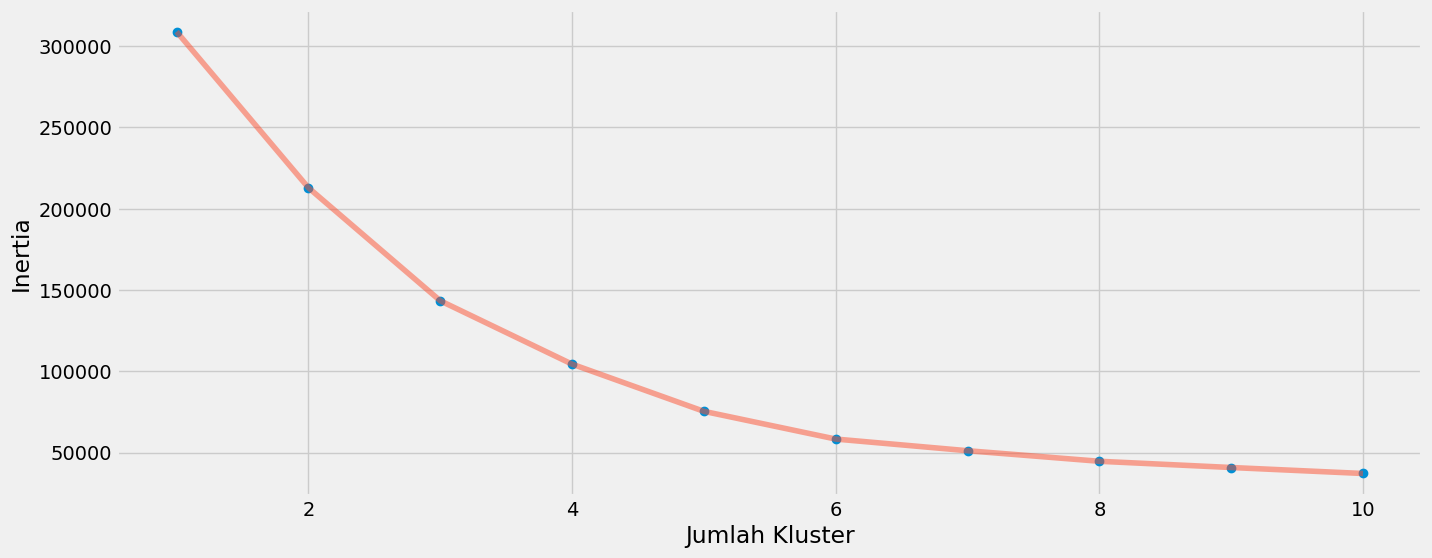

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Jumlah Kluster') , plt.ylabel('Inertia')
plt.show()

Akan digunakan jumlah kluster 6 untuk penggunaan k-means clustering selanjutnya. (6 didapatkan dari elbow point yang dihasilkan pada graph inertia di atas).

In [ ]:
km3 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
km3.fit(X3)
labels3 = km3.labels_
centroids3 = km3.cluster_centers_

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# 3D scatter plot
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=10,
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig)

'temp-plot.html'

In [ ]:
from google.colab import files
files.download('temp-plot.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

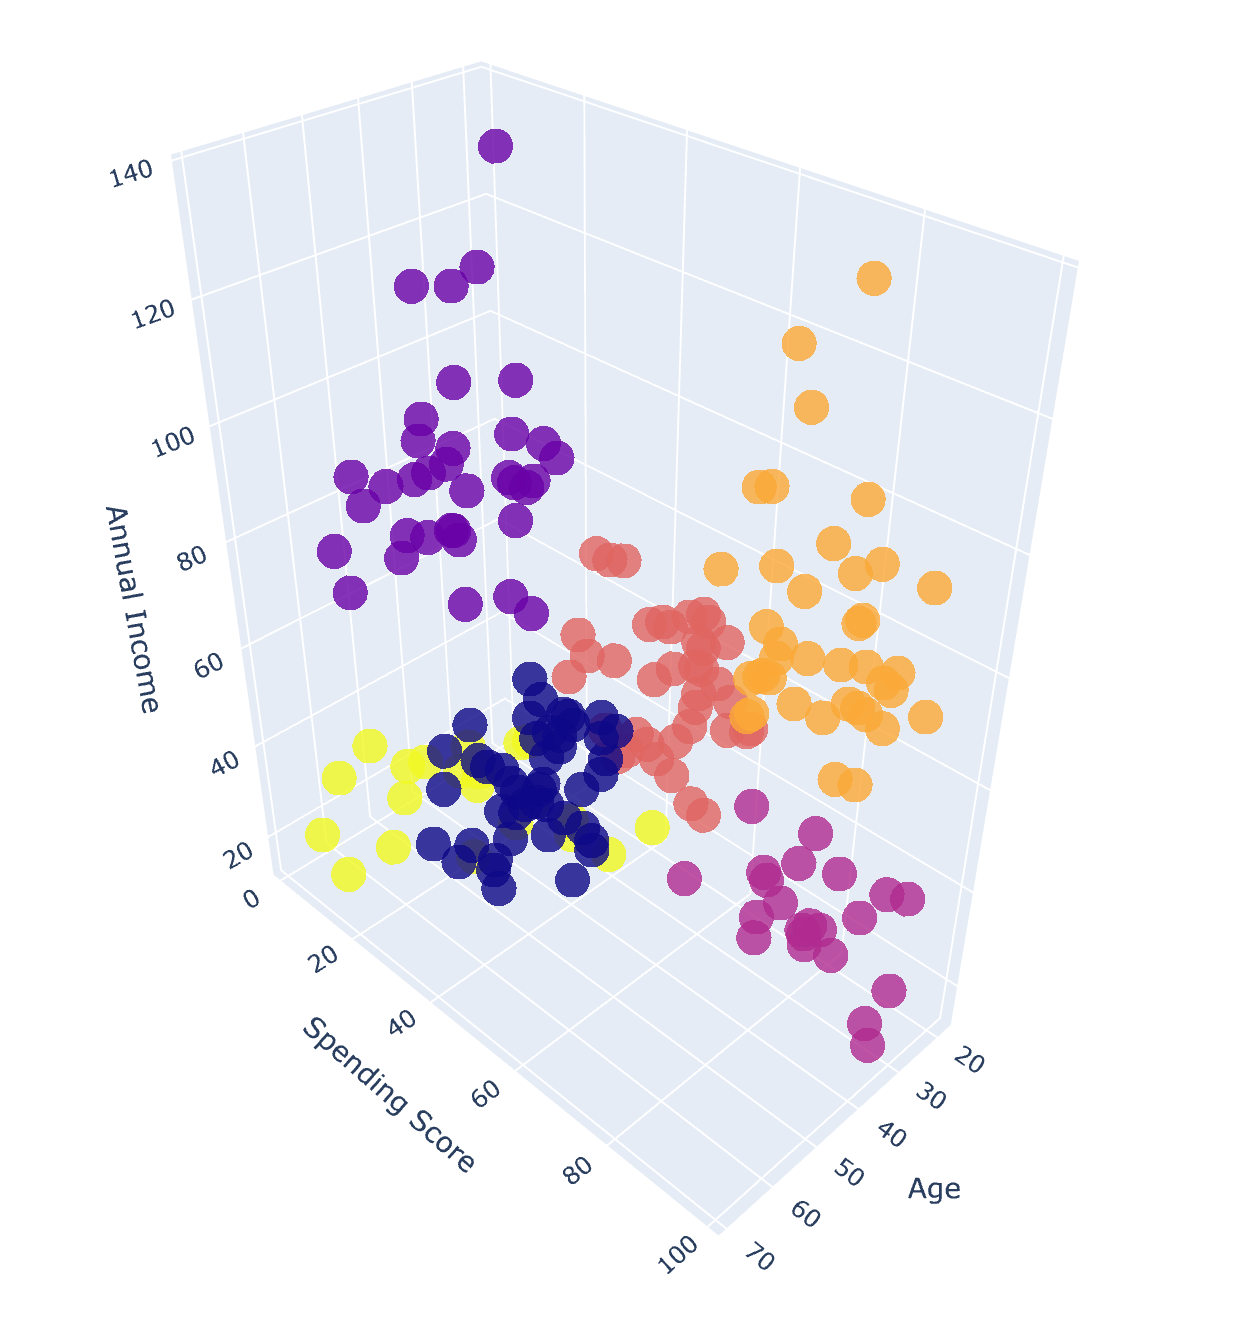

Terdapat beberapa kesimpulan yang bisa didapatkan dari hasil kluster tersebut. Dibentuk 6 cluster berdasarkan elbow point pada inertia yang telah ditunjukkan sebelumnya.
- Keenam cluter dapat menunjukkan distribusi demografis tertentu pada customer di mall yang disesuaikan dengan umur, pendapatan, dan juga score pengeluaran yang dikeluarkan setiap berbelanja di mall.
- Cluster yang berwarna biru dan kuning pada plot merepresentasikan kelompok customer dengan pendapatan rendah dan juga pengeluaran yang rendah.
- Untuk cluster ungu dan merah cenderung lebih menyebar pada pengclusteran ini, hal ini menunjukkan karakteristik cluster yang cenderung lebih besar variasinya.
- Berdasarkan peerilaku pengeluaran, cluster dengan skor pengeluaran yang lebih tinggi (mendekati 100 pada sumbu x) cenderung memiliki customer dengan pendapatan sedang hingga tinggi di berbagai usia.
- Berdasarkan perilaku pengeluaran juga, cluster dengan skor pengeluaran yang lebih renadh cenderung memiliki customer dengan pendapatan rendah hingga sedang.
- Annual income bervariasi di antara kluster-kluster, terdapat dari customer dengan pendapatan rendah dalam beberapa cluster (biru dan kuning) hingga customer berpendapatan tinggi dalam kluster-kluster yang atas (ungu dan orange).